# New Construction Sales: Optimal Pricing Model 


# 1. Business Problem 

## Background

Should the New Construction sales team charge their customers a flat price per Community or per Lead Received? 

#### Pricing Options
- **Builders pay \$40 per lead** whenever a consumer uses the service to contact the builder
- **Builders pay a flat \$400 month** to list it on the service

#### Key Objectives

- Prioritize long-term revenue opportunity over short-term gain
- Deliver the best customer experience for the consumer (More listings is better)

#### Definitions
- A **Community** is a collection of homes owned by a builder. 
- A **Lead** is when a consumer on the service chooses to contact the builder about a specific community.

#### Actuals
New Construction Data for January 2018: 
- 6,174 New Construction Communities advertising 
- delivers an average of 4.00 Leads per Community per Month to existing customers

## Market Research
- There are a total of 38,000 active New Construction communities in the United States today
- The median sale price of a New Construction home is \$350,000
- Of the final sale price, the industry spends on average 1.0\% on marketing and yields an average of 5\% profit after expenses.

### Financial Planning & Analysis Assumptions

#### Pay per Lead Model

##### Leads per Community Per Month Growth

| Year | MoM Growth |
| ---- | :---- |
| 2018 | 5\% |
| 2019 | 4\% |
| 2020 | 1\% |

##### Number of New Construction Communities Advertising Growth

| Year | MoM Growth |
| ---- | :---- |
| 2018 | 6\% |
| 2019 | 4\% |
| 2020 | 2\% |

#### Flat Rate Model

- \$400 price per Community model believes that the **Community Month-Over-Month growth rate will be only 90% the rate of Price per Lead model** as they expect a higher cancellation rate.

| Year | MoM Growth |
| ---- | :---- |
| 2018 | 5.4\% |
| 2019 | 3.6\% |
| 2020 | 1.8\% |

# 2. Questions

- How many communities does each method result in for December 2020?
- What is the overall revenue impact?
- What strategic advantages do you believe each plan provides? What are the drawbacks of each?
- Are there any additional concerns or opportunities about your model based on the information provided? Does anything seem unrealistic?
- If you had more time and resources, what other datasets would you look for and what methodology would you use to solve this problem?


In [1]:
import random
import pandas
import seaborn as sns
import datetime

In [2]:
#Set up variables

years = [2018, 2019, 2020]
months = range(1, 13)
dates = [(year, month) for year in years for month in months]

# Jan 2018 will be our initial actual and can be removed
del dates[0]

# Pay per lead: leads per Community per Month Growth Model
ppl_leads_per_community_growth = {2018: 0.05, 
                                  2019: 0.04, 
                                  2020: 0.01}

# Pay per lead: New Construction Communities Advertising Growth Model
ppl_community_growth = {2018: 0.06, 
                        2019: 0.04, 
                        2020: 0.02}

# Flat Rate: New Construction Communities Advertising Growth Model
fr_community_growth = {2018: 0.054, 
                       2019: 0.036, 
                       2020: 0.018}

# Actuals for Jan 2018

leads_per_community = 4
community_advertising = 6174

ppl_price = 40
fr_price = 400

In [3]:
# Define Month 1 of Actuals

data = [{
    'Year': 2018,
    'Month': 1,
    'PPL: Leads Per Community': leads_per_community,
    'PPL: Community Advertising': community_advertising,
    'FR: Community Advertising': community_advertising,
    'Pay per Lead Revenue': community_advertising * leads_per_community *  ppl_price,
    'Flat Rate Revenue': community_advertising * fr_price
    }]

In [4]:
# Populate Rest of Month and Year

for (year, month) in dates:
        new_ppl_leads_per_community = data[-1]['PPL: Leads Per Community'] * (1.0 + ppl_leads_per_community_growth[year])
        new_ppl_community = data[-1]['PPL: Community Advertising'] * (1.0 + ppl_community_growth[year])
        new_fr_community = data[-1]['FR: Community Advertising'] * (1.0 + fr_community_growth[year])
        new_ppl_rev = new_ppl_community * new_ppl_leads_per_community * ppl_price
        new_fr_rev = new_fr_community * fr_price
       
        
        data.append({
            'Year': year,
            'Month': month,
            'PPL: Leads Per Community': new_ppl_leads_per_community,
            'PPL: Community Advertising': new_ppl_community,
            'FR: Community Advertising': new_fr_community,
            'Pay per Lead Revenue': new_ppl_rev,
            'Flat Rate Revenue': new_fr_rev
            })

In [5]:
#Convert Panda Data frames

final_data = pandas.DataFrame(data = data, columns=['Year', 
                                                    'Month', 
                                                    'PPL: Leads Per Community', 
                                                    'PPL: Community Advertising', 
                                                    'FR: Community Advertising',
                                                    'Pay per Lead Revenue',                                                      
                                                    'Flat Rate Revenue'])

In [6]:
#Set Index

final_data['Date'] = final_data.apply(lambda row: datetime.datetime(int(row['Year']), int(row['Month']), 1), axis=1)
final_data = final_data.set_index('Date')

In [7]:
final_data.describe()

,Year,Month,PPL: Leads Per Community,PPL: Community Advertising,FR: Community Advertising,Pay per Lead Revenue,Flat Rate Revenue
count,36.000000,36.00000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01
mean,2019.000000,6.50000,8.635579,15111.227973,13759.536901,5.823399e+06,5.503815e+06
std,0.828079,3.50102,2.802578,5562.522286,4622.615661,3.555738e+06,1.849046e+06
min,2018.000000,1.00000,4.000000,6174.000000,6174.000000,9.878400e+05,2.469600e+06
25%,2018.000000,3.75000,6.131440,10283.236823,9784.386432,2.523351e+06,3.913755e+06
50%,2019.000000,6.50000,8.829630,15126.252670,13858.609424,5.344422e+06,5.543444e+06
75%,2020.000000,9.25000,11.313340,20012.336266,17837.076905,9.056592e+06,7.134831e+06
max,2020.000000,12.00000,12.342378,23797.606320,20849.888927,1.174876e+07,8.339956e+06


In [8]:
final_data.head(10)

,Year,Month,PPL: Leads Per Community,PPL: Community Advertising,FR: Community Advertising,Pay per Lead Revenue,Flat Rate Revenue
Date,,,,,,,
2018-01-01,2018,1,4.000000,6174.000000,6174.000000,9.878400e+05,2.469600e+06
2018-02-01,2018,2,4.200000,6544.440000,6507.396000,1.099466e+06,2.602958e+06
2018-03-01,2018,3,4.410000,6937.106400,6858.795384,1.223706e+06,2.743518e+06
2018-04-01,2018,4,4.630500,7353.332784,7229.170335,1.361984e+06,2.891668e+06
2018-05-01,2018,5,4.862025,7794.532751,7619.545533,1.515889e+06,3.047818e+06
2018-06-01,2018,6,5.105126,8262.204716,8031.000992,1.687184e+06,3.212400e+06
2018-07-01,2018,7,5.360383,8757.936999,8464.675045,1.877836e+06,3.385870e+06
2018-08-01,2018,8,5.628402,9283.413219,8921.767498,2.090031e+06,3.568707e+06
2018-09-01,2018,9,5.909822,9840.418012,9403.542942,2.326205e+06,3.761417e+06


In [9]:
#Revenue Comparison

total_revenue = final_data.filter(items=['Pay per Lead Revenue', 'Flat Rate Revenue']).sum()

print("Pay per Lead Revenue: ${:,.0f}".format(total_revenue['Pay per Lead Revenue']))
print("Flat Rate Revenue: ${:,.0f}".format(total_revenue['Flat Rate Revenue']))
print("Difference: ${:,.0f}".format(total_revenue['Pay per Lead Revenue'] - total_revenue['Flat Rate Revenue']))

Pay per Lead Revenue: $209,642,350
Flat Rate Revenue: $198,137,331
Difference: $11,505,019


# Answers 

1. How many communities does each method result in for December 2020?


In [18]:
df = final_data.tail(1).filter(items=['PPL: Community Advertising', 'FR: Community Advertising']).round(0)

df['Pay per Lead vs Flat Rate Difference'] = df.apply(lambda row: row['PPL: Community Advertising'] - row['FR: Community Advertising'], axis=1)
df['Pay per Lead vs Flat Rate %'] = df.apply(lambda row: (row['PPL: Community Advertising'] - row['FR: Community Advertising']) / row['FR: Community Advertising'] * 100, axis=1)

df.head(1).round(1)

,PPL: Community Advertising,FR: Community Advertising,Pay per Lead vs Flat Rate Difference,Pay per Lead vs Flat Rate %
Date,,,,
2020-12-01,23798.0,20850.0,2948.0,14.1


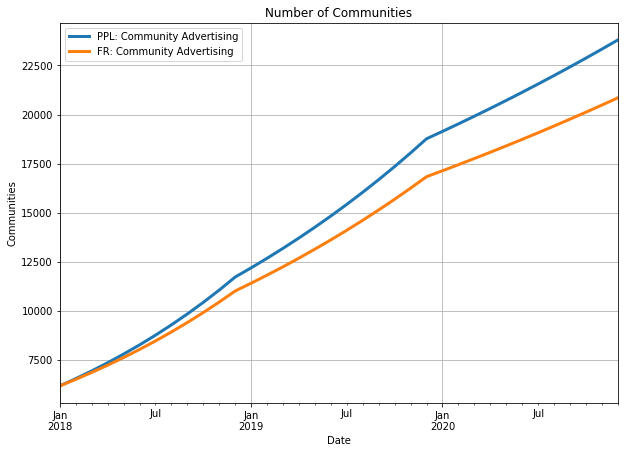

In [12]:
community_df = final_data.filter(items=['PPL: Community Advertising', 'FR: Community Advertising'])
number_commmunity_plot = community_df.plot(linewidth=3.0, figsize=(10, 7))

number_commmunity_plot.set_title('Number of Communities')
number_commmunity_plot.set_ylabel('Communities')
number_commmunity_plot.set_xlabel('Date')
number_commmunity_plot.grid(True)


2. What is the overall revenue impact?

In [14]:
print("Pay per Lead Revenue: ${:,.0f}".format(total_revenue['Pay per Lead Revenue']))
print("Flat Rate Revenue: ${:,.0f}".format(total_revenue['Flat Rate Revenue']))
print("Difference: ${:,.0f}".format(total_revenue['Pay per Lead Revenue'] - total_revenue['Flat Rate Revenue']))

Pay per Lead Revenue: $209,642,350
Flat Rate Revenue: $198,137,331
Difference: $11,505,019


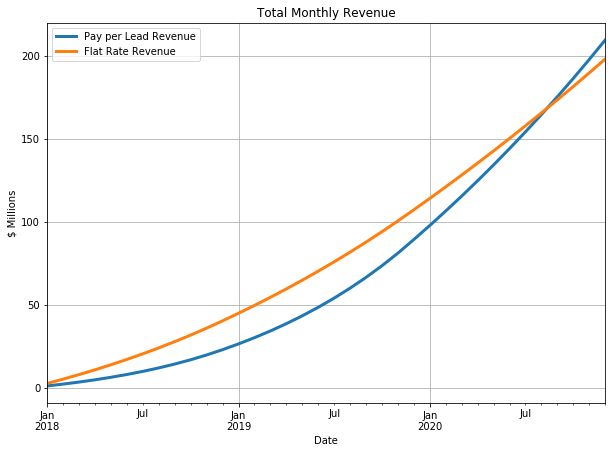

In [15]:
revenue2 = final_data.filter(items=['Pay per Lead Revenue', 'Flat Rate Revenue']).cumsum().apply(lambda x: x/1000000.0)
revenue_plot = revenue2.plot(linewidth=3.0, figsize=(10, 7)) 

revenue_plot.set_title('Total Monthly Revenue')
revenue_plot.set_ylabel('$ Millions')
revenue_plot.set_xlabel('Date')
revenue_plot.grid(True)


3. What strategic advantages do you believe each plan provides? What are the drawbacks of each?

### Pay per Lead Model

#### Advantages
- no up-front cost to builders, allows more customers to try the service risk free
- benefits small builders that have less than 10 leads per month (9 x 40 < 400)
- capture more revenue when business is good (more leads)

#### Disadvantages
- inconsistent revenue, less predicatble as its based on leads generated
- capture less revenue when there is a recession (less leads)
- pay per lead becomes the better model many months

### Flat Rate Model

#### Advantages
- benefits larger builders (economies of scale), builders who receive more than 10 leads (11 x 40 > 400)
- more predictable revenue stream in boom and recessionary economies

#### Disadvantages
- less revenue in the future (\$11.5 million)
- does not deliver the best customer experience (fewer listings)
- hurts small builders with less than 10 leads





4. Are there any additional concerns or opportunities about your model based on the information provided? Does anything seem unrealistic?

### Concerns

#### Number of New Construction Communities
- Market research shows 38,000 active New Construction Communities in the United States today. 
- Based on the forecast, the service will have 62% (23,797) of that amount in just three years! That is a growth of 285%, which may be hard to sustain. 
- Growth will be highly dependent on the growth rate of New Construction Communities overall in the United States.

#### Leads per Sale Model
- Missing lead conversion to home sale data, not every lead results in a sale. 
- Market research shows 1% is spent on marketing with a median home sale of \$350,000 that is 3,500.
- 40 over 3,500 is about 1% of the marketing budget, costs for the builder can quickly add up for homes less than the median home sale price. This will cut into builder profits, where the profit margins are already quite thin.
- Builders want quality leads for a sale, therefore we need to understand how efficient/effective the builder's marketing budget is

### Opportunities 

#### Other Pricing Models

- Dynamic pricing by zip code, charge higher for leads in affluent/popular neighborhoods
- Research other price points for the two models (40 dollars and 400 dollars) that will also impact growth rates
- Mixed Pricing Model that has a lower flat rate fee and charges a lower fee per lead. This captures a stable revenue and the upside of having more leads

#### Improve Builder Experience
Offer Quality Leads by creating algorithms that predict leads with high likelihood of buying a home
Can charge more for quality leads or offer quality leads as part of the flat rate package


5. If you had more time and resources, what other datasets would you look for and what methodology would you use to solve this problem?


Obtain data sets that reveal the lead to sale conversion rate. Builders want quality leads for a sale, therefore we need to understand how efficient/effective the builder's marketing budget is on the service and price accordingly. Builders have about 3,500 dollars to spend on marketing per house. The cost per lead needs to be reasonable to that budget.
